# Load the Data

In [120]:
import numpy as np
import pandas as pd

df = pd.read_excel('INF2178_A1_data.xlsx') #load the dataset
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [121]:
# Preparing the dataset
selected_columns = ['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 
                    'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 
                    'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
df = df[selected_columns]
df.head()

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0


# Data Cleaning

In [122]:
# Display number of missing values
df.isnull().sum()

CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64

In [79]:
# Display basic statistics
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [80]:
# Replace the missing values in program model by mode
df['PROGRAM_MODEL'].fillna(df['PROGRAM_MODEL'].mode()[0], inplace=True)

# For rows where CAPACITY_TYPE is 'Room Based Capacity', set the bed columns to 0
df.loc[df['CAPACITY_TYPE'] == 'Room Based Capacity', ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']] = 0

# For rows where CAPACITY_TYPE is 'Bed Based Capacity', set the room columns to 0
df.loc[df['CAPACITY_TYPE'] == 'Bed Based Capacity', ['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']] = 0

df.head()

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0


In [81]:
# Check number of missing values
df.isnull().sum()

CAPACITY_TYPE           0
PROGRAM_MODEL           0
SERVICE_USER_COUNT      0
CAPACITY_ACTUAL_BED     0
OCCUPIED_BEDS           0
CAPACITY_ACTUAL_ROOM    0
OCCUPIED_ROOMS          0
dtype: int64

# Exploratory Data Analysis (EDA):

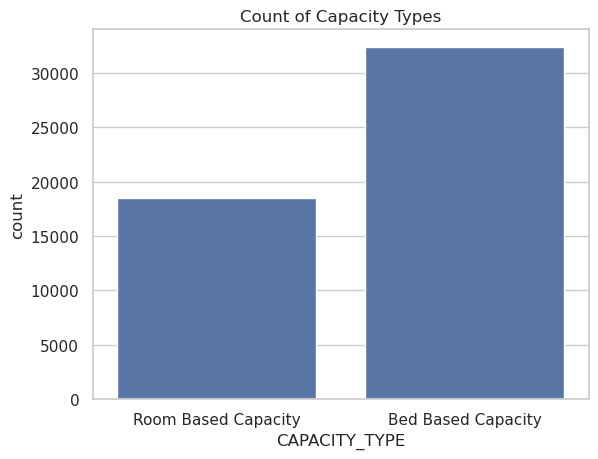

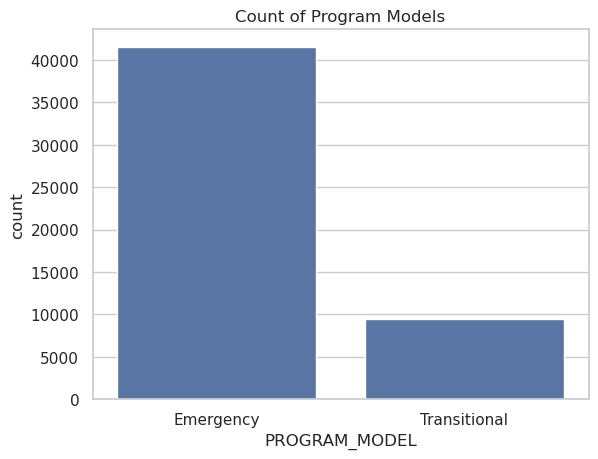

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count of each category in CAPACITY_TYPE
sns.countplot(x='CAPACITY_TYPE', data=df)
plt.title('Count of Capacity Types')
plt.show()

# Count of each category in PROGRAM_MODEL
sns.countplot(x='PROGRAM_MODEL', data=df)
plt.title('Count of Program Models')
plt.show()

In [124]:
# Get the capacity rate base on the capacity type
df['BED_CAPACITY'] = df['OCCUPIED_BEDS']/df['CAPACITY_ACTUAL_BED']
df['ROOM_CAPACITY'] = df['OCCUPIED_ROOMS']/df['CAPACITY_ACTUAL_ROOM']

# Create CAPACITY_RATE column
df['CAPACITY_RATE'] = np.where(df['CAPACITY_TYPE'] == 'Room Based Capacity', df['ROOM_CAPACITY'], df['BED_CAPACITY'])

# Drop the BED_CAPACITY and ROOM_CAPACITY columns
df.drop(['BED_CAPACITY', 'ROOM_CAPACITY'], axis=1, inplace=True)

df.head()

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,CAPACITY_RATE
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,0.928571


In [97]:
# Get two DataFrames base on different capacity type
df_room = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']
df_bed = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']

# Get two DataFrames base on different program model
df_emergency = df[df['PROGRAM_MODEL'] == 'Emergency']
df_transitional = df[df['PROGRAM_MODEL'] == 'Transitional']

In [98]:
# Define function for summary statistics
def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [99]:
# Get summary statistic for Room Capacity
print('\n\nRoom Capacity summary statistics')
get_summary_statistics(df_room['CAPACITY_RATE'])



Room Capacity summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04


In [100]:
# Get summary statistic for Emergency Capacity
print('\n\nBed Capacity summary statistics')
get_summary_statistics(df_bed['CAPACITY_RATE'])



Bed Capacity summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1


In [101]:
# Get summary statistic for Bed Capacity
print('\n\n Emergency Capacity summary statistics')
get_summary_statistics(df_emergency['CAPACITY_RATE'])



 Emergency Capacity summary statistics
Min: 0.01
Mean: 0.94
Max: 1.01
25th percentile: 0.95
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.05


In [103]:
# Get summary statistic for Bed Capacity
print('\n\n Transitional Capacity summary statistics')
get_summary_statistics(df_transitional['CAPACITY_RATE'])



 Transitional Capacity summary statistics
Min: 0.22
Mean: 0.88
Max: 1.0
25th percentile: 0.82
Median: 0.92
75th percentile: 1.0
Interquartile range (IQR): 0.18


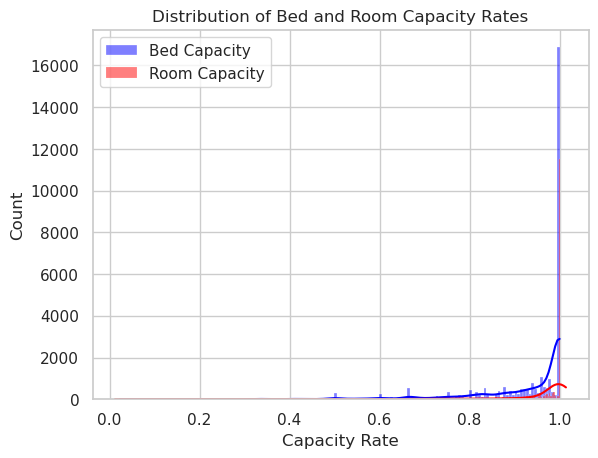

In [105]:
# Distribution of CAPACITY_RATES (BED_CAPACITY and ROOM_CAPACITY)
sns.histplot(df_bed['CAPACITY_RATE'], kde=True, color='blue', label='Bed Capacity')
sns.histplot(df_room['CAPACITY_RATE'], kde=True, color='red', label='Room Capacity')
plt.xlabel('Capacity Rate')
plt.title('Distribution of Bed and Room Capacity Rates')
plt.legend()
plt.show()

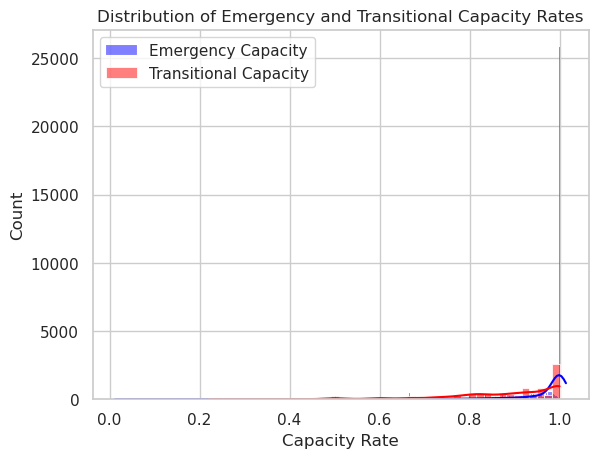

In [107]:
# Distribution of CAPACITY_RATES base on different program model(Emergency and Transitional)
sns.histplot(df_emergency['CAPACITY_RATE'], kde=True, color='blue', label='Emergency Capacity')
sns.histplot(df_transitional['CAPACITY_RATE'], kde=True, color='red', label='Transitional Capacity')
plt.xlabel('Capacity Rate')
plt.title('Distribution of Emergency and Transitional Capacity Rates')
plt.legend()
plt.show()

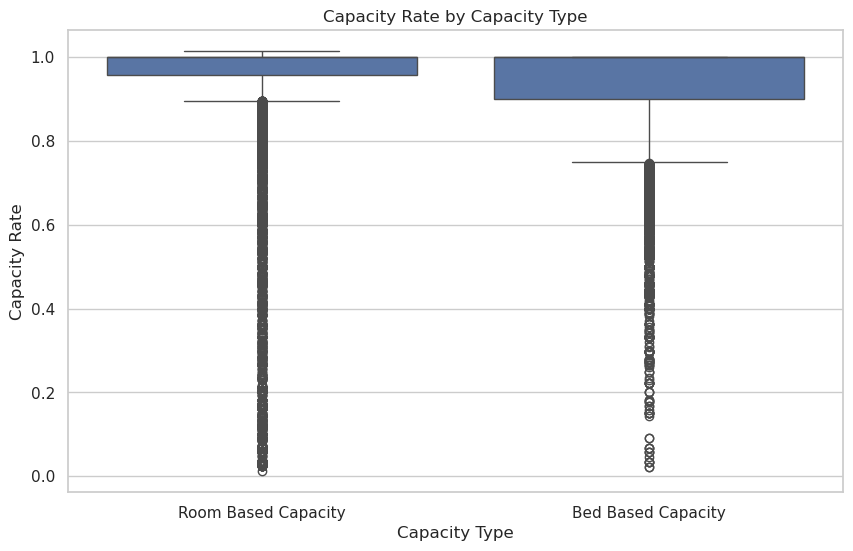

In [108]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAPACITY_TYPE', y='CAPACITY_RATE', data=df)

plt.title('Capacity Rate by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Capacity Rate')
plt.show()

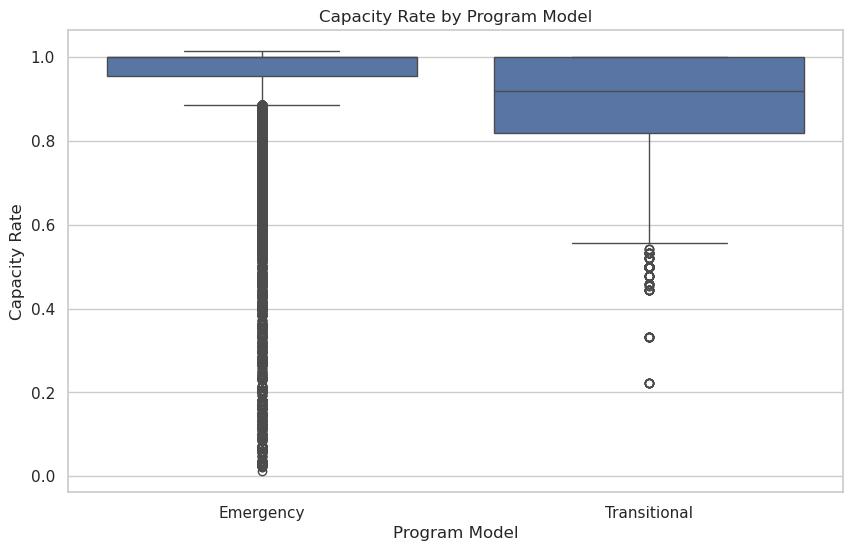

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_RATE', data=df)

plt.title('Capacity Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Capacity Rate')
plt.show()

Research Question: 

Is there a significant difference on capacity rate between two capacity type?

Is there a significant difference on capacity rate between two program model?

# T-Test

In [114]:
from scipy import stats

# Extract the capacity rates for each capacity type
x = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['CAPACITY_RATE']
y = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['CAPACITY_RATE']

# Perform the two-sample t-test
t_stat, p_val = stats.ttest_ind(x,y)

print("Two-sample t-test results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("There is a significant difference in capacity rates between the two capacity types.")
else:
    print("There is no significant difference in capacity rates between the two capacity types.")


Two-sample t-test results:
t-statistic = 4.854104599422829
p-value = 1.2128933183471424e-06
There is a significant difference in capacity rates between the two capacity types.


In [117]:
# Perform Welch's t-test
t_stat, p_val = stats.ttest_ind(x, y, equal_var=False)

print("Welch's t-test results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("There is a significant difference in capacity rates between the two capacity types.")
else:
    print("There is no significant difference in capacity rates between the two capacity types.")


Welch's t-test results:
t-statistic = 4.498751771925636
p-value = 6.860477551487939e-06
There is a significant difference in capacity rates between the two capacity types.


In [116]:
# Extract the capacity rates for each capacity type
m = df[df['PROGRAM_MODEL'] == 'Emergency']['CAPACITY_RATE']
n = df[df['PROGRAM_MODEL'] == 'Transitional']['CAPACITY_RATE']

# Perform the two-sample t-test
t_stat, p_val = stats.ttest_ind(m,n)

print("Two-sample t-test results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("There is a significant difference in capacity rates between the two program model.")
else:
    print("There is no significant difference in capacity rates between the two program model.")

Two-sample t-test results:
t-statistic = 39.06876276218507
p-value = 0.0
There is a significant difference in capacity rates between the two program model.


In [119]:
# Perform Welch's t-test
t_stat, p_val = stats.ttest_ind(m, n, equal_var=False)

print("Welch's t-test results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("There is a significant difference in capacity rates between the two program model.")
else:
    print("There is no significant difference in capacity rates between the two program model.")

Welch's t-test results:
t-statistic = 40.97518639553636
p-value = 0.0
There is a significant difference in capacity rates between the two program model.
